In [13]:
import tensorflow as tf
import numpy as np
import pathlib
import PIL.Image as Image
import cv2

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)/'flower_photos'
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [16]:
kk=list(data_dir.glob('*/*.jpg'))
kk[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/19271410704_932d1f2c97_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14107161906_5737e0e4ec.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5835539224_75967fc400_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/12407768513_3440238148_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2535495431_e6f950443c.jpg')]

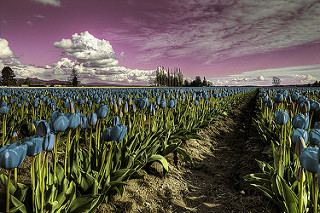

In [17]:
tulips=list(data_dir.glob('tulips/*.jpg'))
Image.open(str(tulips[5]))

In [18]:
flower_ddict={
    'roses':list(data_dir.glob('roses/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'tulips':list(data_dir.glob('tulips/*.jpg')),
    }

In [19]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [20]:
X, y = [], []

for flower_name, images in flower_ddict.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is None:
            print(f"⚠️ Failed to load image: {image}")
            continue  # Skip this image

        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [21]:
!pip show tensorflow tensorflow-hub

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
---
Name: tensorflow-hub
Version: 0.16.1
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, protobuf, tf-keras
Re

In [22]:
import tensorflow as tf
import tensorflow_hub as hub

# Load TF Hub feature extractor
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224, 224, 3),
                                         trainable=False)

# Functional model
model1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),  # Workaround
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [23]:
x=np.array(X)
y=np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_trainn=x_train/255
x_testt=x_test/255

In [26]:
model1.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model1.fit(x_trainn,y_train,epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 801ms/step - accuracy: 0.5567 - loss: 1.1725
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 82s 812ms/step - accuracy: 0.8557 - loss: 0.4201
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 796ms/step - accuracy: 0.8920 - loss: 0.3212
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 803ms/step - accuracy: 0.9158 - loss: 0.2670
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 825ms/step - accuracy: 0.9289 - loss: 0.2433
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 75s 812ms/step - accuracy: 0.9448 - loss: 0.2027
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 798ms/step - accuracy: 0.9527 - loss: 0.1739
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 89s 878ms/step - accuracy: 0.9554 - loss: 0.1617
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 85s 913ms/step - accuracy: 0.9726 - loss: 0.1309
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 849ms/step - accuracy: 0.9724 - loss: 0.1296


In [27]:
model1.evaluate(x_testt,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 856ms/step - accuracy: 0.8930 - loss: 0.3199


[0.3494361639022827, 0.8787465691566467]

In [28]:
kk=model1.predict(x_testt)

23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 839ms/step


In [32]:
ll=np.argmax(kk[50,:])

In [33]:
def get_key_by_value(dict, target):
  for key, value in dict.items():
        if value == target:
            print("predicted class=",key)
            tulips=list(data_dir.glob(f'{key}/*.jpg'))
            Image.open(str(tulips[ll]))


In [34]:
get_key_by_value(flowers_labels_dict,ll)

predicted class= roses
